# Bayesian Estimation

Assume we have a coin with probability q of obtaining a head (a Bernouilli experiment).
We will look at q as a random variable that needs to be estimated given an observed dataset and combining our prior belief in what values q could have. 

Initially, q follows our **prior distribution**. It represents our knowledge about q before we start flipping the coin. We will update this distribution after each trial to obtain a **posterior distribution**.

For example, assume that q is a uniform random variable on the interval [0, 1]. 
for all q, $P(q)=1$.

We now run an experiment - flip our coin n times. We note $x_i$ the outcome of the i-th flip (0 for tail, 1 for head).

What is the probability distribution of q knowing the observations $x_i$? 

Bayes' formula allows us to compute the posterior distribution analytically.

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
posterior = lambda n, h, q: (n+1) * st.binom(n, q).pmf(h)

### Exercise

1. Which prior is assumed in this analytic expression of the posterior distribution?
2. Write the function posterior_normal which computes the posterior when the prior is a Normal distribution with mean &mu; and standard deviation &sigma; (check https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

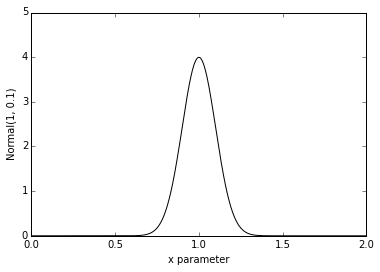

In [25]:
mu = 1.0
sigma = 0.1
q = np.linspace(0., 2.0 * mu, 1000)
f = lambda x: norm(mu, sigma).pdf(x)
fq = f(q)
plt.plot(q, fq, '-k')
plt.xlabel('x parameter')
plt.ylabel('Normal(1, 0.1)')
plt.ylim(0, fq.max()+1);

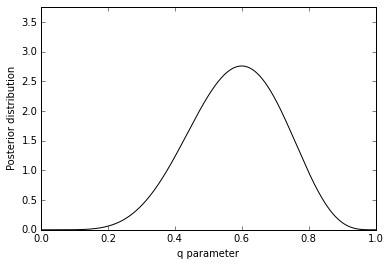

In [4]:
n = 10
h = 6
q = np.linspace(0., 1., 1000)
d = posterior(n, h, q)
plt.plot(q, d, '-k')
plt.xlabel('q parameter')
plt.ylabel('Posterior distribution')
plt.ylim(0, d.max()+1);

If we run the experiment on more data, the posterior distribution on q becomes more "peaky":

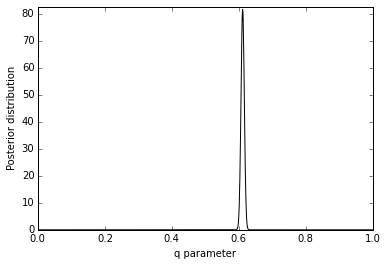

In [5]:
n = 10000
h = 6120
q = np.linspace(0., 1., 1000)
d = posterior(n, h, q)
plt.plot(q, d, '-k')
plt.xlabel('q parameter')
plt.ylabel('Posterior distribution')
plt.ylim(0, d.max()+1);

# Bayesian Model Averaging (Predictive Posterior Distribution)

Given the posterior distribution over the model parameter $q$, we want to predict the outcome of an experiment.
What are the odds of obtaining heads given what we know about $q$?

The answer is given by the predictive posterior distribution, which is the weighted average of all possible models 
(that is all possible values of $q$) according to their probability in the posterior distribution (this is called _marginalization_):

$$p(x = 1 | D) = \int_{0}^{1} p(x | q) p(q | D) dq$$

In [6]:
import scipy.integrate as integrate
from scipy.stats import bernoulli

pred_posterior = lambda x, n, h: integrate.quad(lambda q: posterior(n,h,q) * bernoulli(q).pmf(x), 0, 1)

In [7]:
pred_posterior(1, 10, 6)

(0.5833333333333338, 6.476300976980085e-15)

In [8]:
pred_posterior(1, 10000, 6000)

(0.5999800039999207, 2.120175107817716e-09)

In [9]:
pred_posterior(1, 10000, 6001)

(0.6000799840099218, 2.9147310459440583e-09)